
# Sentiment Analysis "Reviews of Foods from Amazon"



## Importing Data and Libraries

In [1]:
import sys
print(sys.executable)

/Users/abrarsaad/opt/anaconda3/bin/python


In [2]:
pip install some_package

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df=pd.read_csv("/Users/abrarsaad/desktop/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

# EDA

####  Dealing With Missing Values

In [7]:
#first,detecting the null values where we found 16 in profileName and 27 in summary
df.isnull().sum() 


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#I dealt with null values in ProfileName ,filling with unknown
df['ProfileName'].fillna('unknown',inplace=True)
df['Summary'].fillna('unknown',inplace=True)

In [9]:
df.isnull().sum() 

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
################pikil shceck ###############################
def load_model(model_file):
    try:
        with open(model_file ,'rb')as reader:
            model=pk.load(reader)
            return model 
    except Exception as e:
        print(e)
        return None 

# Feature Engineering 

In [11]:
def labelfunk(Score):
    if Score >=4:
        return 'Positive'
    elif Score <=2:
        return 'Negative'
    else:
        return 'Netural'
df['Label']=df['Score'].apply(labelfunk)
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Positive
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Positive
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Positive


In [12]:
counts = df['Label'].value_counts()
counts

Positive    443777
Negative     82037
Netural      42640
Name: Label, dtype: int64

In [13]:
data=df.copy()

## EDA

 This figure shows the most common words in amazon food reviews 

In [14]:
# Downsampling
df_Sample = pd.concat([data[data.Label == 'Positive'].sample(10000),
                        data[data.Label == 'Negative'].sample(10000),
                        data[data.Label == 'Netural'].sample(10000)]).reset_index(drop=True)

In [15]:
positive = df_Sample[df_Sample.Label=="Positive"]["Text"].values
negative = df_Sample[df_Sample.Label=="Negative"]["Text"].values
netural  = df_Sample[df_Sample.Label=="Netural"]["Text"].values

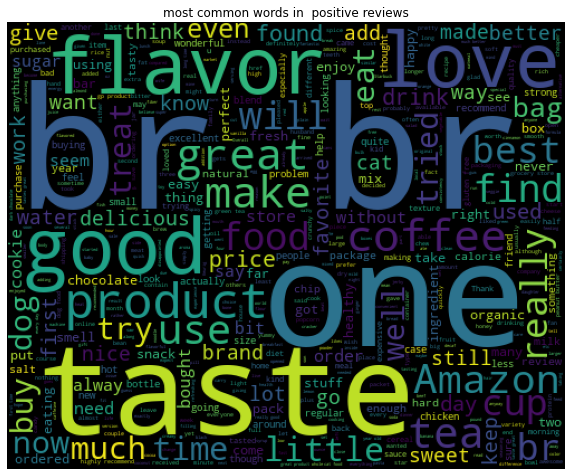

In [16]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(positive))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.title('most common words in  positive reviews')
plt.imshow(wordcloud)
plt.show()

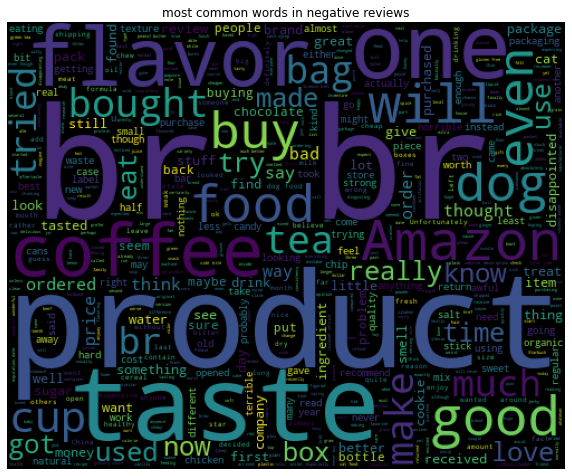

In [17]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(negative))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.title('most common words in negative reviews')
plt.imshow(wordcloud)
plt.show()

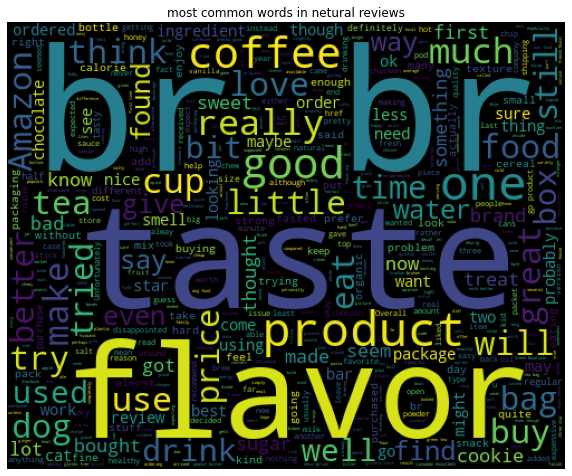

In [18]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(netural))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.title('most common words in netural reviews')
plt.imshow(wordcloud)
plt.show()

Text(0, 0.5, 'Number of Reviews')

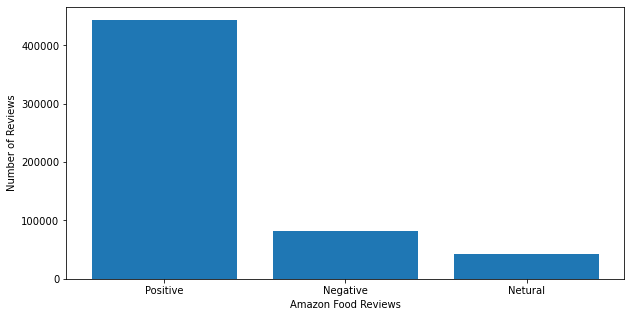

In [19]:
# This plot shows the amount of reviews we have labeled as positive,negative and netural
plt.figure(figsize=(10,5))
plt.bar(df.Label.astype(str).value_counts().index, df.Label.astype(str).value_counts());
plt.xlabel('Amazon Food Reviews')
plt.ylabel('Number of Reviews')

 Class Imbalance..

# pre-processing the Text 

#### Removing unneeded columns

In [20]:
data.drop(columns=['Id','UserId', 'Time','HelpfulnessNumerator','HelpfulnessDenominator'],axis=0,inplace=True)

In [21]:
data

,ProductId,ProfileName,Score,Summary,Text,Label
0,B001E4KFG0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...
568449,B001EO7N10,Lettie D. Carter,5,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568450,B003S1WTCU,R. Sawyer,2,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568451,B004I613EE,"pksd ""pk_007""",5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568452,B004I613EE,"Kathy A. Welch ""katwel""",5,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


In [22]:
d_sample=data.sample(1000)
d_sample.to_csv("data.csv")# save it before the clean

#### Cleaning Reviews Text

In [23]:
# Cleaning the Text colums. Removing links, symbols, emojis, etc.
import re
def clean_text(text):
    cleaned_text = []
    for reviews in text:
        cleaned_words = []
        for word in reviews.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text

In [24]:
d_sample['Reviews_clean']=clean_text(d_sample['Text'])

In [27]:
#Applying lemmatizer to the Reviews to achieve the root forms of derived words.
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize_words(reviews, lemmatizer):
    cleaned_text=[]
    for review in reviews:
        cleaned_words=[]
        for word in review.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2

In [28]:
wordnet_lemmatizer = WordNetLemmatizer()
d_sample['Reviews_clean']=lemmatize_words(d_sample['Reviews_clean'],lemmatizer=wordnet_lemmatizer)

In [32]:
d_sample

,ProductId,ProfileName,Score,Summary,Text,Label,Reviews_clean
278565,B0012YGT9O,"J. Johnson ""Collector of things""",5,Love my banana plant!,"My banana plant arrived in great condition, no...",Positive,my banana plant arrived in great condition no ...
262016,B001926R3M,"Chatton Mom ""maririn77""",3,Why is it so expensive at Amazon.com?,"After reading the review here, I wonder why so...",Netural,after reading the review here wonder why so ma...
556185,B001ULOUMC,"Occasional Critic ""skypilot""",5,The real deal,"These have that ""pop"" that only Virginia Peanu...",Positive,these have that pop that only virginia peanut ...
542098,B003YXAQN6,Cburgett1,5,Cburgett1,"What can I say, delicious. Light plastic bottl...",Positive,what can say delicious light plastic bottle ea...
527981,B000WFRN1C,Murphy S. Maclean,5,AvoDerm Natural Chicken - Cat Formula,As I said with the salmon formula - As those o...,Positive,said with the salmon formula those of you know...
...,...,...,...,...,...,...,...
497864,B000LKVD5U,Linda Mullings,5,Delicious!!,Perfect!! They are my favorite because I can s...,Positive,perfect they are my favorite because can seaso...
441086,B005VOONM6,Lia Smurf,4,Smooth taste,Coffee has very smooth taste. I had to do som...,Positive,coffee ha very smooth taste had to do some res...
496804,B005HG9ET0,"John B. Goode ""JBG""",5,Excellent!,Pros:<br />Tastes like my regular filtered wat...,Positive,prosbr taste like my regular filtered water wi...
413712,B0026KPDG8,David Gasior,5,Delicious,My favorite PopChips flavor is the Parmesan Ga...,Positive,my favorite popchips flavor is the parmesan ga...


In [77]:
# remove text colomn

In [99]:
d_sample.to_csv("Reviews_clean.csv")# save it after the clean to check 

### Use the data after pre-processing

In [101]:
df=pd.read_csv("/Users/abrarsaad/desktop/Reviews_clean.csv")
df.head()

,Unnamed: 0,ProductId,ProfileName,Score,Summary,Text,Label,Reviews_clean
0,278565,B0012YGT9O,"J. Johnson ""Collector of things""",5,Love my banana plant!,"My banana plant arrived in great condition, no broken leaves or anything. I re-potted right away into an 8 inch self watering plastic pot and it has been thriving near a window in my living room. I've gotten a new leaf about every week or so. I cant wait to get fruit growing on it, but even just as a fruitless house plant it is very neat. Every leaf that grows is larger than the one before it. Highly recommend!",Positive,my banana plant arrived in great condition no broken leaf or anything re potted right away into an inch self watering plastic pot and it ha been thriving near window in my living room ive gotten new leaf about every week or so cant wait to get fruit growing on it but even just fruitless house plant it is very neat every leaf that grows is larger than the one before it highly recommend
1,262016,B001926R3M,"Chatton Mom ""maririn77""",3,Why is it so expensive at Amazon.com?,"After reading the review here, I wonder why so many people have had trouble in using this product. I have been using this product for several years for my cats, and I only have had one or two defectives that the grass did not grow. Maybe because of the climate? It germinates just in 2-3 days and keeps almost 2 weeks here in California.<br />I usually purchase them from Petguys.com, because this item is the most lowly priced there, and it is still cheaper than the retail store even including the shipment if you buy more than 4.<br />Because the item was out of stock at Petguys.com, I wondered if I could buy it at Amazon, and I was shocked to see the price. The price is almost double!",Netural,after reading the review here wonder why so many people have had trouble in using this product have been using this product for several year for my cat and only have had one or two defectives that the grass did not grow maybe because of the climate it germinates just in day and keep almost week here in californiabr usually purchase them from petguyscom because this item is the most lowly priced there and it is still cheaper than the retail store even including the shipment if you buy more than br because the item wa out of stock at petguyscom wondered if could buy it at amazon and wa shocked to see the price the price is almost double
2,556185,B001ULOUMC,"Occasional Critic ""skypilot""",5,The real deal,"These have that ""pop"" that only Virginia Peanuts can deliver. (why is that?) They vanished from the office in about 2 days.Will definitely order more.",Positive,these have that pop that only virginia peanut can deliver why is that they vanished from the office in about dayswill definitely order more
3,542098,B003YXAQN6,Cburgett1,5,Cburgett1,"What can I say, delicious. Light plastic bottle, easy for shipping. Tasty product. Purchase without regret. Tastes great on whatever you put it on.",Positive,what can say delicious light plastic bottle easy for shipping tasty product purchase without regret taste great on whatever you put it on
4,527981,B000WFRN1C,Murphy S. Maclean,5,AvoDerm Natural Chicken - Cat Formula,"As I said with the salmon formula - As those of you know, cats can be picky eaters but this AvoDerm chicken satisfies even my most picky eater. My vet tells me that the cats are healthy and have bright eyes and shiny coats.",Positive,said with the salmon formula those of you know cat can be picky eater but this avoderm chicken satisfies even my most picky eater my vet tell me that the cat are healthy and have bright eye and shiny coat


In [102]:
df.shape

(1000, 8)

## Count Vectorizer

In [103]:
text= df['Reviews_clean']

In [104]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
#countvectorize to convert the text into n columns based on the number of words 
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(stop_words='english')
X_cv1 = cv1.fit_transform(text)
text_vec= pd.DataFrame(X_cv1.toarray(), columns=cv1.get_feature_names())
text_vec

,abc,aber,ability,able,abnormal,aboutbr,abr,absence,absent,absolute,...,zip,ziplock,zipper,ziwipeak,zu,zucchini,zuccninibr,zufall,zukes,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
text_vec.sum(0).sort_values(ascending=False)[:20]


wa         538
like       518
br         469
taste      393
good       355
product    354
flavor     325
love       313
just       310
tea        261
great      258
coffee     251
ha         227
food       214
dog        214
make       210
really     173
dont       165
cup        156
time       152
dtype: int64

## Td-IdfVectorizer

In [106]:
#we are going to try with TifdfVectorizer in order to obtain accurate result 

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the document-term matrix with TF-IDF vectorizer
cv_tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = cv_tfidf.fit_transform(text).toarray()
dt_tfidf = pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

,abc,aber,ability,able,abnormal,aboutbr,abr,absence,absent,absolute,...,zip,ziplock,zipper,ziwipeak,zu,zucchini,zuccninibr,zufall,zukes,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#from sklearn.decomposition import NMF
#from sklearn.metrics.pairwise import cosine_similarity

In [110]:
#feature extraction 

In [111]:
from sklearn.decomposition import NMF

## Topic Modeling

### LSA model using features extracted from TF-IDF Vectorizer

In [112]:
# function for displaying the words in each topic to be used for all models.
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

In [122]:
lsa_model = TruncatedSVD(5)
lsa_topic = lsa_model.fit_transform(X_tfidf)

In [123]:
display_topics(lsa_model, cv_tfidf.get_feature_names(), 20) 


Topic  0
coffee, wa, like, taste, flavor, br, good, love, product, great, tea, just, dog, cup, food, really, make, ha, price, treat

Topic  1
coffee, cup, pod, strong, tea, flavor, bold, starbucks, flavored, decaf, rich, roast, bodied, brew, smooth, keurig, bitter, ground, brewer, drink

Topic  2
tea, taste, flavor, chocolate, sugar, green, water, drink, chip, sweet, try, ginger, bar, spice, coconut, br, mint, chai, lemon, stash

Topic  3
tea, dog, treat, cat, food, cup, green, coffee, wa, ha, loose, black, love, bigelow, grey, pet, drinker, stash, did, leaf

Topic  4
wa, cat, food, product, store, good, price, amazon, order, stuff, happy, item, grocery, arrived, oil, local, pasta, canned, best, bread


### NMF model using features extracted from TF-IDF Vectorizer





In [124]:
nmf_model = NMF(5)
nmf_topic = nmf_model.fit_transform(X_tfidf)

In [126]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20) 


Topic  0
taste, like, great, wa, product, br, good, flavor, just, chocolate, snack, chip, love, really, little, make, sweet, free, bar, price

Topic  1
coffee, cup, pod, like, strong, flavor, good, great, bold, wa, starbucks, flavored, decaf, roast, rich, use, best, make, price, love

Topic  2
dog, treat, love, product, food, really, pet, picky, dont, chew, teeth, training, toy, like, bone, time, peanut, day, eat, look

Topic  3
tea, flavor, wa, green, cup, ha, drink, taste, black, good, bag, box, loose, stash, mint, chai, leaf, grey, smell, just

Topic  4
cat, food, love, wa, canned, stuff, eat, know, good, best, ha, kitty, meat, diet, eating, treat, dry, store, pet, baby


## spaCy 

In [130]:
! pip install spacy

In [131]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [134]:
#spacy.cli.download("en_core_web_sm")

In [139]:
from spacy import displacy
from spacy.symbols import amod
from collections import Counter

In [137]:
df['spacy_doc'] = list(nlp.pipe(df.Text))

In [140]:
positive_reviews = df[df.Label=='positive']
Netural_reviews = df[df.Label== 'Netural']
negative_reviews = df[df.Label=='negative']

In [141]:
pos_adj = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_=='ADJ']
neg_adj = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_=='ADJ']
net_adj = [token.text.lower() for doc in Netural_reviews.spacy_doc for token in doc if token.pos_ =='ADJ']
pos_noun = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_=='NOUN']
neg_noun = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_=='NOUN']
net_noun =  [token.text.lower() for doc in Netural_reviews.spacy_doc for token in doc if token.pos_=='NOUN']

In [143]:
Counter(net_adj).most_common(10)

[('good', 28),
 ('more', 20),
 ('sweet', 15),
 ('other', 13),
 ('nice', 12),
 ('little', 11),
 ('better', 11),
 ('much', 9),
 ('best', 8),
 ('strong', 8)]

In [146]:
Counter(net_noun).most_common(10)

[('flavor', 28),
 ('coffee', 27),
 ('tea', 24),
 ('product', 22),
 ('taste', 22),
 ('/>i', 14),
 ('water', 13),
 ('food', 13),
 ('sugar', 13),
 ('time', 12)]

In [149]:
def get_amods(noun, ser):
    amod_list = []
    for doc in ser:
        for token in doc:
            if (token.text) == noun:
                for child in token.children:
                    if child.dep == amod:
                        amod_list.append(child.text.lower())
    return sorted(amod_list)

def amods_by_sentiment(noun):
    print(f"Adjectives describing {str.upper(noun)}:\n")
    
    print("POSITIVE:")
    pprint(get_amods(noun, positive_reviews.spacy_doc))
    
    print("\nNEGATIVE:")
    pprint(get_amods(noun, negative_reviews.spacy_doc))

In [152]:
#amods_by_sentiment("food")

In [153]:
#amods_by_sentiment("service")

## Cluster k-mean

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [161]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


In [167]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X_tfidf)
#display_cluster(X_tfidf,km,num_clusters)

KMeans(n_clusters=7)

In [ ]:
#inertias = []

#for k_ in np.arange(1, 30):
   # km = KMeans(n_clusters=k_)
  #  km.fit(X_tfidf)
  #  inertias.append(km.inertia_)

In [ ]:
#plt.plot(np.arange(1, 30), inertias, marker='o')
#plt.vlines(x=8, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
#plt.ylabel("Inertia")
#plt.xlabel('k')
#plt.legend();

## CorEx

In [ ]:
pip install corextopic

In [ ]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import scipy.sparse as ss